<center><u><H1>Series de Tiempo con Pandas</H1></u></center>

In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
datetime.datetime(2019, 1, 1)

datetime.datetime(2019, 1, 1, 0, 0)

In [3]:
# working with string dates: converting string to dates
datetime.datetime.strptime("2019/1/1", "%Y/%m/%d")

datetime.datetime(2019, 1, 1, 0, 0)

In [4]:
#converting date to text
datetime.datetime(2019,1,1,0,0).strftime("%Y%m%d")

'20190101'

### to_datetime function:

### arg : integer, float, string, datetime, list, tuple, 1-d array, Series

In [5]:
pd.to_datetime("15.02.2019")

Timestamp('2019-02-15 00:00:00')

In [6]:
pd.to_datetime("12/24/2019")

Timestamp('2019-12-24 00:00:00')

In [7]:
pd.to_datetime("07/04/2019", dayfirst=True)

Timestamp('2019-04-07 00:00:00')

### Timestamp:

#### Timestamp objects are panda's version of datetime objects. 
#### Timestamp class is a subclass of datetime

In [8]:
index = [pd.Timestamp("2019-01-01"),
        pd.Timestamp("2019-01-02"),
        pd.Timestamp("2019-01-03")]

In [9]:
ts = pd.Series(np.random.randn(len(index)), index=index)
ts

2019-01-01    1.600159
2019-01-02    0.385351
2019-01-03    0.173575
dtype: float64

In [10]:
ts.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03'], dtype='datetime64[ns]', freq=None)

In [11]:
index = pd.to_datetime(["2019-01-01", "2019-01-02", "2019-01-03"])

In [12]:
ts = pd.Series(np.random.randn(len(index)), index=index)

In [13]:
ts.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03'], dtype='datetime64[ns]', freq=None)

### date_range

In [14]:
rng = pd.date_range('1/1/2019', periods=100, freq='M')

In [15]:
#Alias	Description
#B	business day frequency
#C	custom business day frequency
#D	calendar day frequency
#W	weekly frequency
#M	month end frequency
#SM	semi-month end frequency (15th and end of month)
#BM	business month end frequency
#CBM	custom business month end frequency
#MS	month start frequency
#SMS	semi-month start frequency (1st and 15th)
#BMS	business month start frequency
#CBMS	custom business month start frequency
#Q	quarter end frequency
#BQ	business quarter end frequency
#QS	quarter start frequency
#BQS	business quarter start frequency
#A, Y	year end frequency
#BA, BY	business year end frequency
#AS, YS	year start frequency
#BAS, BYS	business year start frequency
#BH	business hour frequency
#H	hourly frequency
#T, min	minutely frequency
#S	secondly frequency
#L, ms	milliseconds
#U, us	microseconds
#N	nanoseconds

In [16]:
ts = pd.Series(np.random.randint(0, 100, len(rng)), index=rng)
ts.head()

2019-01-31    66
2019-02-28    91
2019-03-31    20
2019-04-30    35
2019-05-31    70
Freq: M, dtype: int32

In [17]:
#Converting between time span representations
ps = ts.to_period()
ps.head()

2019-01    66
2019-02    91
2019-03    20
2019-04    35
2019-05    70
Freq: M, dtype: int32

In [18]:
df = pd.read_csv('../data\AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [19]:
dateparse = lambda date: pd.datetime.strptime(date, '%Y-%m')
df = pd.read_csv('../data/AirPassengers.csv', parse_dates=True, index_col='Month',date_parser=dateparse)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [20]:
#Specify the entire range:
df['1960-01-01':'1960-12-01']

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [21]:
#Use ':' if one of the indices is at ends:
df['1960-06-01':]

,#Passengers
Month,
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [22]:
# extract values from a specific year
df['1950']

,#Passengers
Month,
1950-01-01,115
1950-02-01,126
1950-03-01,141
1950-04-01,135
1950-05-01,125
1950-06-01,149
1950-07-01,170
1950-08-01,170
1950-09-01,158


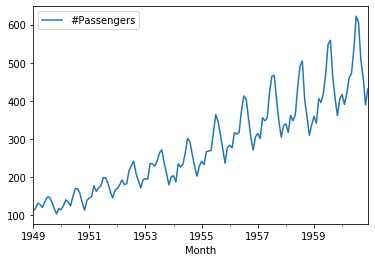

In [23]:
df.plot()

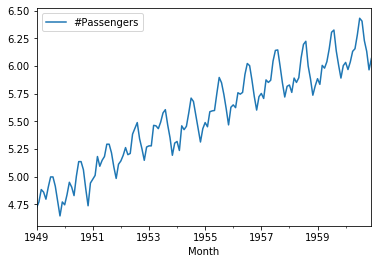

In [24]:
ts_log = np.log(df)
ts_log.plot()

In [25]:
moving_avg = ts_log.rolling(window=12,center=False).mean()

In [26]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


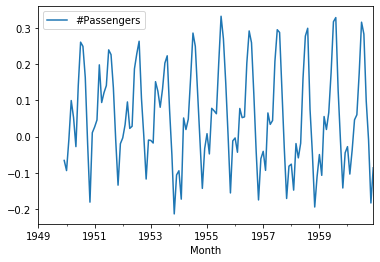

In [27]:
ts_log_moving_avg_diff.plot()

## Reference:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-alliases